In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import urllib2

%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})

In [3]:
# Challenge 1
congressrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

def get_data(url):
    newrl = urllib2.urlopen(url)
    return pd.read_csv(newrl, header=-1)

def challenge_one():
    df            = get_data(congressrl)
    df            = df.replace(['y'], [1])
    df            = df.replace(['n'], [0])
    df = df.replace("?", np.nan)

    for num in list(xrange(1,17)):
        df[num] = df[num].replace(np.nan, df[num].mean())

    return df

df = challenge_one()
# df = get_data(congressrl)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,republican,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,democrat,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,democrat,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,democrat,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


In [4]:
# CHALLENGE TWO

train, test     = train_test_split(df, train_size = 0.8)
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.44208,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.576190,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.49030,0.472136,0.484876,0.487424,0.491847,0.474000,0.487920,0.486125,0.487752,0.496510,0.469464,0.476695,0.485886,0.482078,0.479083,0.340732
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812689
50%,0.00000,0.503876,1.000000,0.000000,0.504762,1.000000,1.000000,1.000000,0.501211,0.504673,0.000000,0.000000,0.509756,1.000000,0.000000,1.000000
75%,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# CHALLENGE THREE

me_range = list(xrange(1,30))
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

scores = []
for num in me_range:
    model   = KNeighborsClassifier(n_neighbors=num)
    model.fit(x_train, y_train)
    y_pred  = model.predict(x_test)
    a_score = accuracy_score(y_test, y_pred)
    scores.append((num, a_score))

# print scores
print "K VALUE WITH HIGHEST ACCURACY:"
scores.sort(key=lambda x: x[1])
print scores[-1][0], scores[-1][1]
# print "Sorted scores list (k value, accuracy score)"
# print scores

K VALUE WITH HIGHEST ACCURACY:
16 0.977011494253


267 168


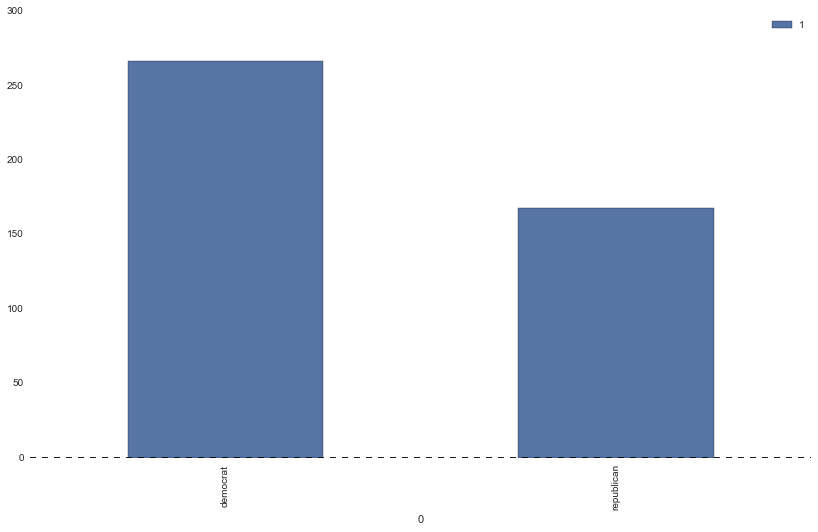

In [6]:

num_dems, num_reps = df.stack().value_counts()[2], df.stack().value_counts()[3]
print num_dems, num_reps
df.head()
ndf = df[[0, 1]]
ndf.head()
ndf2 = ndf.groupby([0]).count()
ndf2.head()
ndf2.plot(kind="bar")

In [7]:
train, test     = train_test_split(df, train_size = 0.8)

me_range = list(xrange(1,30))

x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]

x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

def dem_list(X):
  return ("democrat "*len(X)).strip().split()

def rep_list(X):
  return ("republican "*len(X)).strip().split()

model   = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = dem_list(list(xrange(1,88)))
a_score = accuracy_score(y_test, y_pred)
y_pred  = rep_list(list(xrange(1,88)))
b_score = accuracy_score(y_test, y_pred)

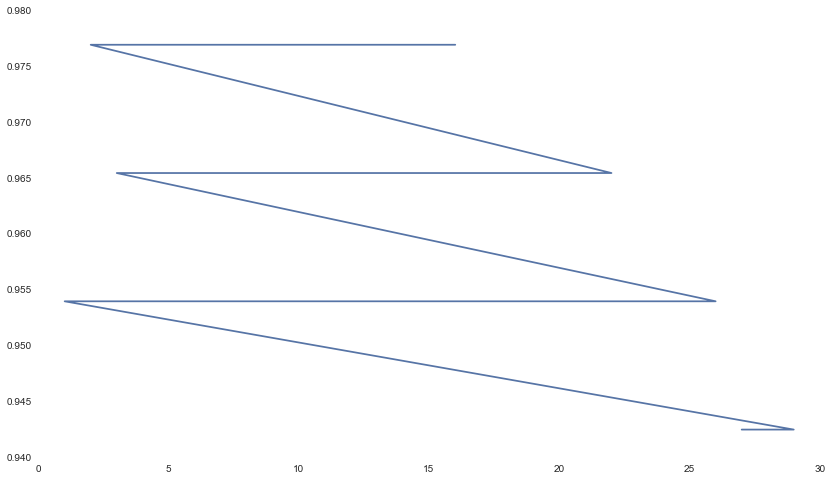

In [8]:
# Challenge 6
my_y, my_x = [], []
for my_tuple in scores:
    my_y.append(my_tuple[0])
    my_x.append(my_tuple[1])
plt.plot(my_y, my_x)

In [9]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score

[ 0.97701149  0.9822695   0.9769392   0.97916667  0.96896552] [ 0.91954023  0.92873563  0.94022989  0.95172414  0.96091954]


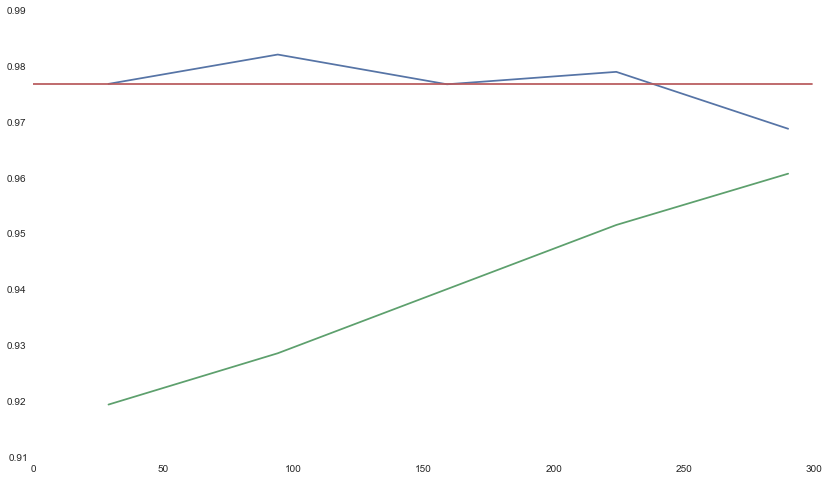

In [10]:
model                   = LogisticRegression()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")

print train_cv_err, test_cv_err

knn_x = np.arange(0, 300)
knn_y = [scores[-1][1]]*300
plt.plot(knn_x, knn_y, label="KNN")

[ 0.97701149  0.95744681  0.94968553  0.94940476  0.94597701] [ 0.89655172  0.92643678  0.91954023  0.94252874  0.93103448]


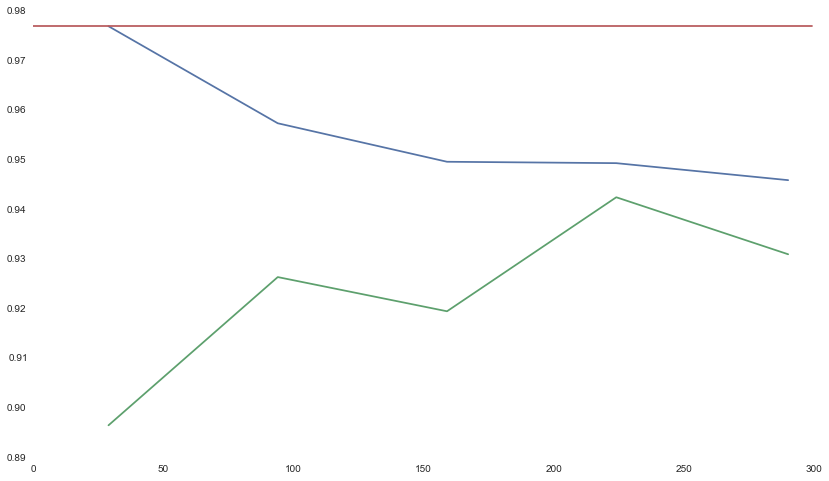

In [11]:
from sklearn.naive_bayes import GaussianNB

model                   = GaussianNB()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")

print train_cv_err, test_cv_err

plt.plot(knn_x, knn_y, label="KNN")



[ 0.94252874  0.97163121  0.9706499   0.97321429  0.95977011] [ 0.92183908  0.92183908  0.93563218  0.95632184  0.95402299]


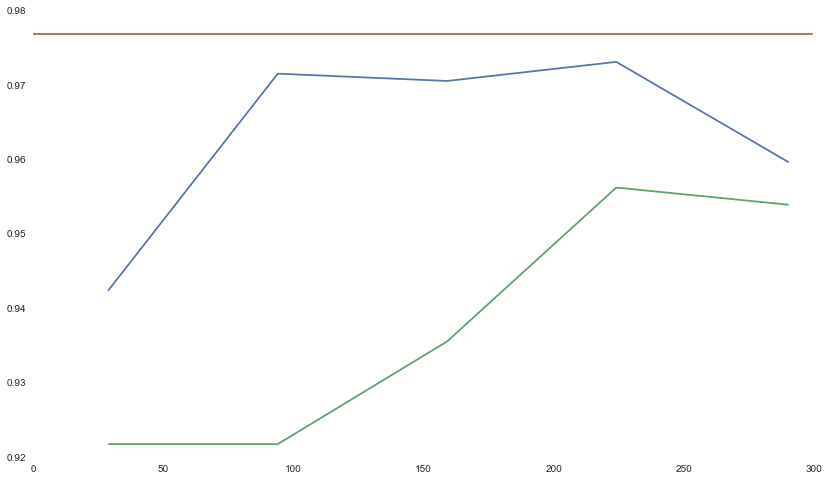

In [12]:
from sklearn.svm import SVC

model                   = SVC()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")

print train_cv_err, test_cv_err

plt.plot(knn_x, knn_y, label="KNN")

[ 1.  1.  1.  1.  1.] [ 0.91724138  0.91724138  0.94252874  0.93103448  0.95172414]


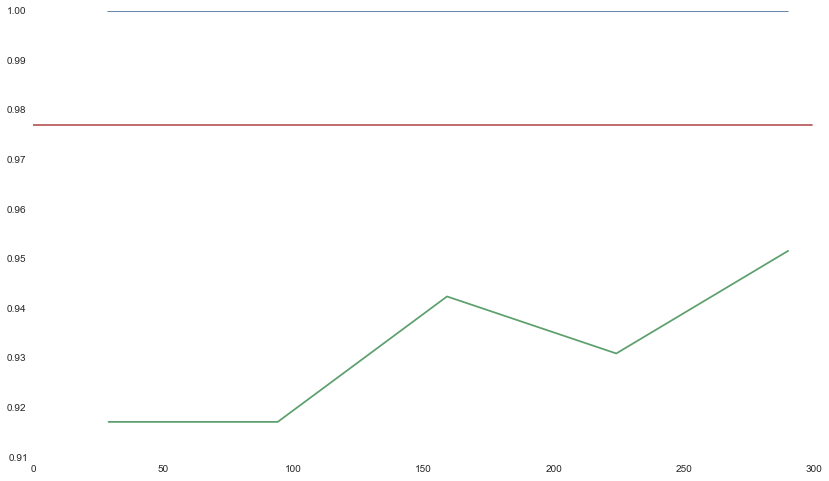

In [13]:
from sklearn.tree import DecisionTreeClassifier

model                   = DecisionTreeClassifier()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")

print train_cv_err, test_cv_err

plt.plot(knn_x, knn_y, label="KNN")

[ 1.          0.9929078   0.99371069  0.9985119   0.99770115] [ 0.90804598  0.92643678  0.93333333  0.96091954  0.96091954]


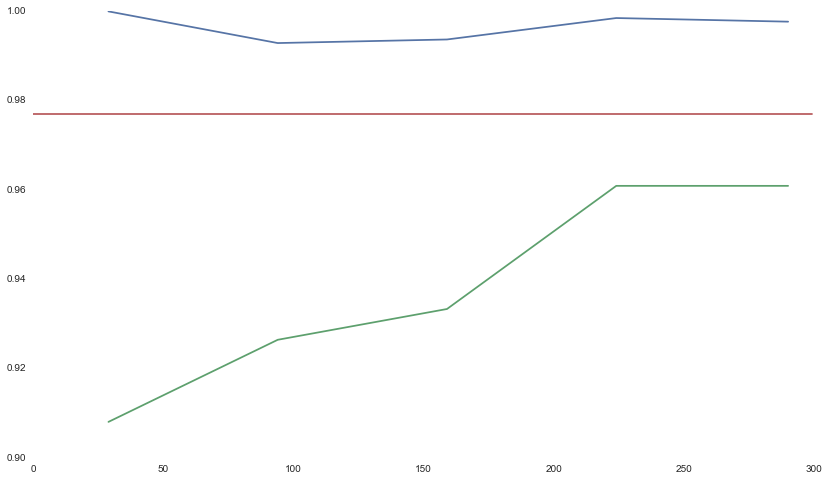

In [14]:
from sklearn.ensemble import RandomForestClassifier

model                   = RandomForestClassifier()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
m, train_err, test_err  = learning_curve(model, x_all, y_all)
train_cv_err            = np.mean(train_err,axis=1)
test_cv_err             = np.mean(test_err,axis=1)
plt.plot(m, train_cv_err, label="Training")
plt.plot(m, test_cv_err, label="Test")

print train_cv_err, test_cv_err

plt.plot(knn_x, knn_y, label="KNN")

In [15]:
model                   = LogisticRegression()
np.mean(cross_val_score(model,x_all,y_all))

0.96091954022988502

In [16]:
model                   = GaussianNB()
np.mean(cross_val_score(model,x_all,y_all))

0.93103448275862066

In [17]:
model                   = SVC()
np.mean(cross_val_score(model,x_all,y_all))

0.95402298850574718

In [18]:
model                   = DecisionTreeClassifier()
np.mean(cross_val_score(model,x_all,y_all))

0.94482758620689655

In [19]:
model                   = RandomForestClassifier()
np.mean(cross_val_score(model,x_all,y_all))

0.96091954022988502

In [20]:
# Challenge 10

def challenge_ten():
    df            = get_data(congressrl)
    df            = df.replace(['y'], [1])
    df            = df.replace(['n'], [0])
    df            = df.replace("?", np.nan)
    for num in list(xrange(1,17)):
        df[num] = df[num].replace(np.nan, int(df[num].mode()))
    return df


df = challenge_ten()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [21]:
train, test     = train_test_split(df, train_size = 0.8)


x_all    = df.iloc[:,2:]
y_all  = df.iloc[:,1]

x_train  = train.iloc[:,2:]
y_train  = train.iloc[:,1]
x_test   = test.iloc[:,2:]
y_test   = test.iloc[:,1]

model    = LogisticRegression()
model.fit(x_train, y_train)

y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)

# print y_pred
print a_score

# np.mean(cross_val_score(model,x_all,y_all))

0.655172413793


In [22]:
# Challenge 12

healthrl="https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
df=get_data(healthrl)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [23]:
age = df[0]
age.describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: 0, dtype: float64

In [24]:
survived = df.loc[df[3] == 1]
survived[0].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: 0, dtype: float64

In [25]:
dead = df.loc[df[3] == 2]
dead[0].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: 0, dtype: float64

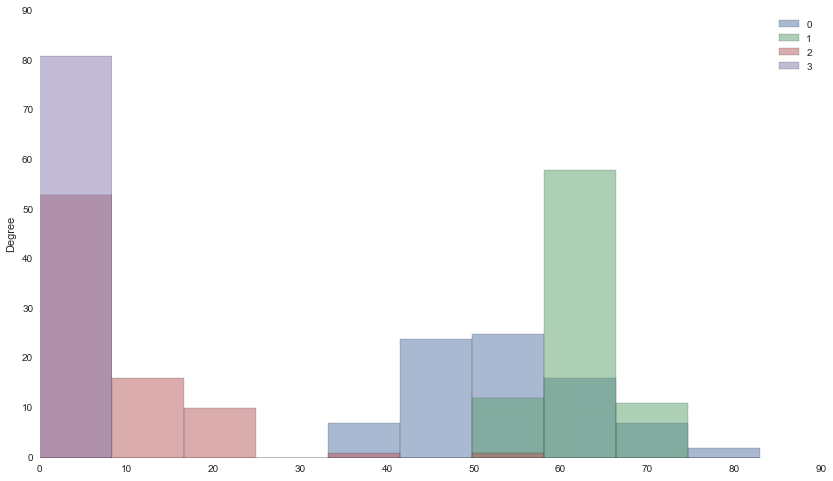

In [26]:
dead.plot(kind='hist', alpha=0.5)

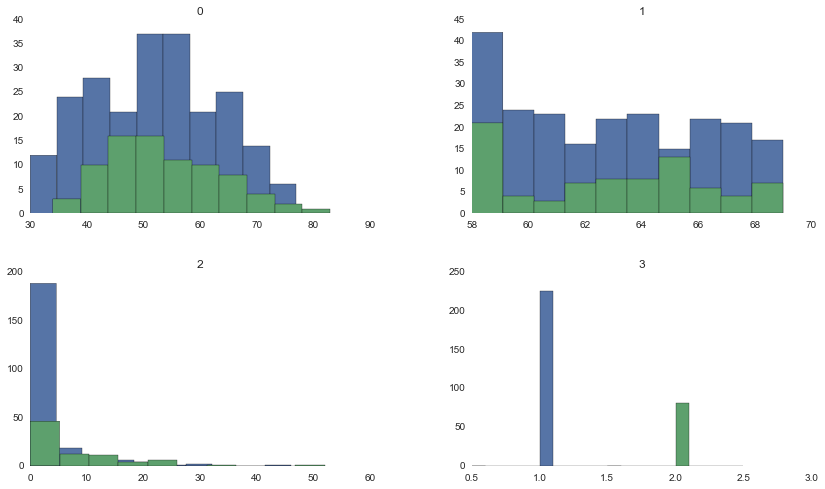

In [27]:
plt.figure()
# survived.plot(kind='hist', alpha=0.5, figsize=(5,5))
# dead.plot(kind='hist', alpha=0.5, figsize=(5,5))
axs = survived.hist()
for ax, (colname, values) in zip(axs.flat, dead.iteritems()):
    values.hist(ax=ax, bins=10)

In [28]:
df[1].min() + 1900

1958

In [29]:
df[1].max() + 1900

1969

In [30]:
train, test     = train_test_split(df, train_size = 0.8)

x_train  = train.iloc[:,0:3]
y_train  = train.iloc[:,3]
x_test   = test.iloc[:,0:3]
y_test   = test.iloc[:,3]

model    = LogisticRegression()
model.fit(x_train, y_train)

y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
model.coef_

array([[ 0.02393162, -0.03917538,  0.07772281]])

In [32]:
import math
for num in model.coef_:
    print 10**num

[ 1.05665114  0.91374417  1.19597696]
